In [43]:
#imports
import csv

import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit, transpile
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.algorithms.optimizers import *
from qiskit.providers.aer import QasmSimulator

from qiskit_machine_learning.neural_networks import CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.datasets import ad_hoc_data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

import random
import time

random.seed(69069)
np.random.seed(69069)

# Artificial problem


In [63]:
#data from previous tests
artificial_data = [[5.59203492, 4.27256601],
       [5.27787566, 0.69115038],
       [3.39292007, 2.57610598],
       [5.71769863, 4.39822972],
       [4.77522083, 0.37699112],
       [3.26725636, 1.82212374],
       [1.57079633, 4.1469023 ],
       [3.64424748, 3.89557489],
       [0.69115038, 0.06283185],
       [1.13097336, 2.51327412],
       [1.31946891, 5.40353936],
       [2.63893783, 3.95840674],
       [3.26725636, 5.2150438 ],
       [4.58672527, 0.        ],
       [4.96371639, 6.1575216 ],
       [0.12566371, 3.95840674],
       [3.39292007, 4.1469023 ],
       [3.14159265, 2.07345115],
       [2.76460154, 5.90619419],
       [3.20442451, 1.94778745],
       [0.75398224, 4.27256601],
       [1.25663706, 4.58672527],
       [1.00530965, 3.83274304],
       [1.19380521, 0.56548668],
       [4.90088454, 0.75398224],
       [1.44513262, 2.0106193 ],
       [2.70176968, 1.0681415 ],
       [3.89557489, 0.25132741],
       [2.26194671, 0.43982297],
       [6.1575216 , 5.40353936],
       [1.63362818, 4.39822972],
       [3.0787608 , 5.65486678],
       [5.96902604, 5.52920307],
       [1.38230077, 0.75398224],
       [2.76460154, 3.95840674],
       [1.50796447, 2.19911486],
       [5.84336234, 0.81681409],
       [5.65486678, 4.20973416],
       [0.43982297, 0.81681409],
       [1.13097336, 1.31946891],
       [3.33008821, 3.89557489],
       [3.0787608 , 0.69115038],
       [5.02654825, 3.89557489],
       [0.81681409, 2.19911486],
       [5.90619419, 4.33539786],
       [1.13097336, 4.46106157],
       [4.83805269, 4.08407045],
       [0.87964594, 2.45044227],
       [4.52389342, 1.31946891],
       [2.38761042, 4.20973416],
       [4.64955713, 0.37699112],
       [1.25663706, 1.38230077],
       [5.0893801 , 0.75398224],
       [6.1575216 , 4.20973416],
       [3.01592895, 3.95840674],
       [1.13097336, 2.136283  ],
       [3.70707933, 4.33539786],
       [1.19380521, 0.9424778 ],
       [3.26725636, 2.57610598],
       [5.52920307, 0.75398224],
       [1.0681415 , 2.136283  ],
       [1.50796447, 5.52920307],
       [4.27256601, 4.08407045],
       [2.76460154, 4.52389342],
       [3.64424748, 4.64955713],
       [1.50796447, 2.32477856],
       [2.89026524, 5.02654825],
       [5.84336234, 4.39822972],
       [5.84336234, 1.00530965],
       [2.95309709, 6.1575216 ],
       [4.46106157, 2.38761042],
       [1.44513262, 3.70707933],
       [5.78053048, 0.75398224],
       [0.81681409, 5.59203492],
       [0.56548668, 5.84336234],
       [3.14159265, 5.71769863],
       [2.32477856, 0.50265482],
       [1.57079633, 6.1575216 ],
       [5.0893801 , 5.90619419],
       [1.0681415 , 5.34070751],
       [5.84336234, 1.88495559],
       [2.76460154, 4.52389342],
       [0.69115038, 2.19911486],
       [4.58672527, 0.31415927],
       [0.25132741, 5.2150438 ],
       [3.01592895, 4.83805269],
       [0.06283185, 0.9424778 ],
       [1.31946891, 4.46106157],
       [4.39822972, 2.136283  ],
       [4.0212386 , 2.0106193 ],
       [3.83274304, 2.51327412],
       [6.09468975, 2.89026524],
       [2.26194671, 0.50265482],
       [5.02654825, 0.81681409],
       [3.0787608 , 1.0681415 ],
       [2.70176968, 5.96902604],
       [1.44513262, 2.0106193 ],
       [3.58141563, 4.64955713],
       [1.19380521, 4.46106157],
       [1.25663706, 2.07345115],
       [1.13097336, 3.01592895],
       [5.02654825, 1.69646003],
       [4.77522083, 3.0787608 ],
       [5.90619419, 3.20442451],
       [1.94778745, 0.        ],
       [2.38761042, 2.89026524],
       [4.20973416, 3.26725636],
       [1.50796447, 3.0787608 ],
       [4.58672527, 5.65486678],
       [2.70176968, 3.14159265],
       [4.71238898, 3.26725636],
       [4.0212386 , 0.18849556],
       [1.82212374, 2.38761042],
       [0.31415927, 3.70707933],
       [2.19911486, 6.22035345],
       [0.        , 0.50265482],
       [0.12566371, 3.64424748],
       [6.22035345, 0.87964594],
       [2.0106193 , 5.2150438 ],
       [4.39822972, 3.0787608 ],
       [6.22035345, 0.69115038],
       [2.0106193 , 2.0106193 ],
       [2.19911486, 4.96371639],
       [1.88495559, 0.56548668],
       [1.00530965, 3.14159265],
       [1.19380521, 6.1575216 ],
       [4.46106157, 0.43982297],
       [6.09468975, 3.83274304],
       [2.45044227, 3.39292007],
       [0.50265482, 4.90088454],
       [1.13097336, 0.18849556],
       [0.31415927, 0.31415927],
       [5.2150438 , 6.09468975],
       [1.69646003, 0.56548668],
       [4.27256601, 0.56548668],
       [2.19911486, 1.38230077],
       [3.83274304, 1.38230077],
       [2.19911486, 4.83805269],
       [2.0106193 , 0.        ],
       [4.58672527, 5.59203492],
       [5.34070751, 6.1575216 ],
       [1.75929189, 2.70176968],
       [1.57079633, 3.26725636],
       [6.22035345, 0.56548668],
       [3.51858377, 0.43982297],
       [1.75929189, 0.81681409],
       [4.08407045, 4.96371639],
       [5.90619419, 3.14159265],
       [4.58672527, 5.71769863],
       [6.22035345, 5.65486678],
       [3.70707933, 0.75398224],
       [1.13097336, 2.89026524],
       [4.83805269, 4.52389342],
       [1.94778745, 2.63893783],
       [0.87964594, 3.0787608 ],
       [2.136283  , 0.31415927],
       [0.18849556, 4.52389342],
       [4.90088454, 5.02654825],
       [1.19380521, 3.39292007],
       [2.57610598, 3.20442451],
       [3.83274304, 3.45575192],
       [1.13097336, 3.0787608 ],
       [3.95840674, 4.90088454],
       [1.88495559, 3.20442451],
       [0.69115038, 3.39292007],
       [2.38761042, 3.45575192],
       [4.52389342, 5.90619419],
       [2.136283  , 5.2150438 ],
       [0.18849556, 1.69646003],
       [4.52389342, 3.51858377],
       [4.27256601, 3.01592895],
       [4.33539786, 5.96902604],
       [4.0212386 , 4.83805269],
       [0.37699112, 1.38230077],
       [4.20973416, 4.83805269],
       [4.58672527, 3.58141563],
       [2.19911486, 1.94778745],
       [5.02654825, 0.12566371],
       [0.69115038, 6.09468975],
       [5.15221195, 1.88495559],
       [2.07345115, 1.50796447],
       [0.81681409, 6.1575216 ],
       [4.33539786, 0.12566371],
       [0.12566371, 4.58672527],
       [2.57610598, 5.0893801 ],
       [4.33539786, 5.96902604],
       [4.08407045, 0.06283185],
       [1.63362818, 5.15221195],
       [4.20973416, 3.26725636],
       [4.27256601, 6.09468975],
       [4.27256601, 2.82743339],
       [2.0106193 , 5.34070751],
       [1.94778745, 5.0893801 ],
       [0.        , 1.44513262],
       [4.1469023 , 3.51858377],
       [4.08407045, 4.83805269],
       [0.81681409, 6.1575216 ],
       [4.71238898, 5.65486678],
       [1.00530965, 3.39292007],
       [5.65486678, 4.90088454],
       [3.26725636, 5.59203492],
       [1.25663706, 0.43982297],
       [2.95309709, 3.76991118],
       [2.95309709, 4.96371639],
       [1.50796447, 2.136283  ],
       [5.40353936, 0.62831853],
       [5.78053048, 0.25132741],
       [3.26725636, 3.70707933],
       [1.13097336, 4.20973416],
       [0.31415927, 4.1469023 ],
       [0.12566371, 2.26194671],
       [5.59203492, 1.75929189],
       [2.82743339, 0.9424778 ],
       [5.46637122, 0.87964594],
       [4.71238898, 0.37699112],
       [3.20442451, 5.27787566],
       [3.01592895, 5.46637122],
       [1.63362818, 6.22035345],
       [5.78053048, 0.50265482],
       [0.        , 3.95840674],
       [2.95309709, 4.52389342],
       [2.82743339, 0.9424778 ],
       [0.43982297, 1.82212374],
       [4.0212386 , 2.45044227],
       [1.13097336, 2.19911486],
       [2.0106193 , 2.95309709],
       [4.0212386 , 4.71238898],
       [5.84336234, 4.83805269],
       [2.32477856, 4.46106157],
       [4.27256601, 0.37699112],
       [0.        , 0.62831853],
       [4.1469023 , 6.22035345],
       [2.76460154, 2.95309709],
       [1.0681415 , 0.37699112],
       [1.31946891, 3.01592895],
       [2.0106193 , 1.57079633],
       [4.0212386 , 4.96371639],
       [4.0212386 , 1.57079633],
       [1.44513262, 2.95309709],
       [1.25663706, 3.39292007],
       [3.83274304, 1.25663706],
       [4.20973416, 2.95309709],
       [5.15221195, 6.1575216 ],
       [3.39292007, 0.37699112],
       [6.09468975, 5.71769863],
       [3.64424748, 0.62831853],
       [4.27256601, 3.26725636],
       [1.69646003, 3.01592895],
       [4.27256601, 0.37699112],
       [3.45575192, 0.69115038]]

artificial_targets = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

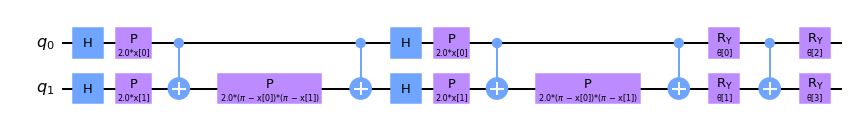

In [38]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

feature_map = ZZFeatureMap(feature_dimension=len(artificial_data[0]), 
                                 reps=2, entanglement='linear')

amplitudes = RealAmplitudes(len(artificial_data[0]), reps = 1)

circuit = QuantumCircuit(2)
circuit.append(feature_map, range(2))
circuit.append(amplitudes, range(2))
display(circuit.decompose().decompose().draw('mpl'))

In [26]:
n_shots = 1024

simulator_gpu = Aer.get_backend('aer_simulator')
simulator_gpu.set_options(device='GPU')
quantum_instance = QuantumInstance(simulator_gpu, shots=n_shots)


output_shape = 2
def parity(x):
    return '{:b}'.format(x).count('1') % 2

def print_weights(weights, obj_func_eval):
    print('Current weight: ' + str(weights))

def fit_and_score(circuit_classifier, x_train, y_train, x_test, y_test):
    # fit classifier to data
    circuit_classifier.fit(x_train, y_train)
    score_train =  circuit_classifier.score(x_train, y_train)
    score_test =  circuit_classifier.score(x_test, y_test)
    print("Mean Accuracy training: " + str(score_train))
    print("Mean Accuracy testing: " + str(score_test))
    return score_train, score_test

def get_classifier(circuit, n_features):
    circuit_qnn = CircuitQNN(circuit=circuit,    
                         input_params=circuit.parameters[0:n_features],
                         weight_params=circuit.parameters[n_features:],
                         interpret=parity,
                         output_shape=output_shape,
                         quantum_instance=quantum_instance)

    # construct classifier
    return NeuralNetworkClassifier(neural_network=circuit_qnn,                                             
                                                optimizer=COBYLA(),
                                                callback=print_weights)

In [34]:
#leave commented out if you have weights

seed = 58262
x_train,x_test,y_train,y_test = train_test_split(artificial_data, artificial_targets, test_size=1-3/4, random_state=seed)
"""

classifier = get_classifier(circuit.copy(), len(data[0]))
score_train, score_test = fit_and_score(classifier, np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test))
print('Training accuracy: ' + str(score_train))
print('Testing accuracy: ' + str(score_test))
display(print('Circuit done'))
"""

"\n\nclassifier = get_classifier(circuit.copy(), len(data[0]))\nscore_train, score_test = fit_and_score(classifier, np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test))\nprint('Training accuracy: ' + str(score_train))\nprint('Testing accuracy: ' + str(score_test))\ndisplay(print('Circuit done'))\n"

## Weights

`weights = np.array([2.18600792 2.83439774 2.21637015 2.13002849])`

Achieved accuracy:

Mean Accuracy training: 0.983957219251337

Mean Accuracy testing: 0.9682539682539683

Split seed: 58262

## Plot the circuit as a graph? or so?

In [85]:
from matplotlib.colors import ListedColormap

weights = [2.18600792, 2.83439774, 2.21637015, 2.13002849]

trained_circuit = circuit.copy()

probabilities = []

for i, entry in enumerate(artificial_data):
    simulator = QasmSimulator()
    params = np.append(entry, weights)
    qc = trained_circuit.assign_parameters(params)
    qc.measure_all()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=10000)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    probabilities.append({int(k, 2): v for k, v in counts.items()})

In [122]:
parsed_probabilities = []
for item in probabilities:
    count_1 = 0
    count_2 = 0
    for k, v in item.items():
        if k%2 == 0:
            count_1 += v
        else:
            count_2 += v
    total = count_1 + count_2
    count_1 = 100 * count_1 / total
    count_2 = 100 * count_2 / total

    parsed_probabilities.append([count_1, count_2])

In [123]:
art_data_x = []
art_data_y = []

for entry in artificial_data:
    art_data_x.append(entry[0])
    art_data_y.append(entry[1])

len(parsed_probabilities)

250

TypeError: Length of x (250) must match number of columns in z (2)

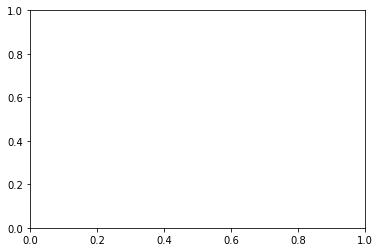

In [117]:
cm = plt.cm.RdBu
plt.contourf(art_data_x, art_data_y, parsed_probabilities, cmap=cm, alpha=0.8)


# IRIS dataset


In [20]:
seed = 10247

data = np.array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.6, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 2.3, 3.3, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.7, 3. , 4.2, 1.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3],
       [6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 2.9, 5.6, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 3. , 5.5, 2.1],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.8, 5.1, 2.4],
       [6.4, 3.2, 5.3, 2.3],
       [6.5, 3. , 5.5, 1.8],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
output_shape = 3
def parity(x):
    return '{:b}'.format(x).count('1') % 3

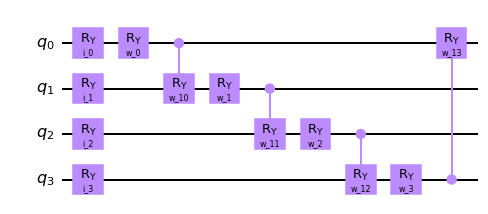

In [24]:
feature_map = QuantumCircuit(4)
ansatz = QuantumCircuit(4)
for i in range(len(data[0])):
    feature_map.ry(Parameter('i_' + str(i)),i)
    ansatz.ry(Parameter('w_' + str(i)),i)
    ansatz.cry(Parameter('w_' + str(10+i)), i, (i+1)%4)


circuit = QuantumCircuit(4)
circuit.append(feature_map, range(4))
circuit.append(ansatz, range(4))

circuit.decompose().draw('mpl')

In [30]:
classifier = get_classifier(circuit.copy(), len(data[0]))
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=1-3/4, random_state=seed)
score_train, score_test = fit_and_score(classifier, np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test))
print('Training accuracy: ' + str(score_train))
print('Testing accuracy: ' + str(score_test))
display(print('Circuit done'))

Current weight: [0.59559308 0.82063761 0.43014774 0.4928928  0.30413117 0.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 0.43014774 0.4928928  0.30413117 0.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 1.82063761 0.43014774 0.4928928  0.30413117 0.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 1.43014774 0.4928928  0.30413117 0.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 0.43014774 1.4928928  0.30413117 0.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 0.43014774 0.4928928  1.30413117 0.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 0.43014774 0.4928928  0.30413117 1.43868753
 0.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 0.43014774 0.4928928  0.30413117 1.43868753
 1.51013163 0.09296298]
Current weight: [1.59559308 0.82063761 0.43014774 0.4928928  0.30413117 1.43868753
 0.51013163 1.09296298]
Current weight: [1.93453228 0.1661212

None

## Weights

`weights = [1.15895918 -0.02776545  0.57544357  0.64231599 -0.76607124  1.76925974\n  0.65355883  0.82655407]`

Mean Accuracy training: 0.6607142857142857
Mean Accuracy testing: 0.6052631578947368